In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import csv


In [3]:
# Removed NULL in excel

SG_graduate_employment = pd.read_csv('SG_graduate_employment.csv')
SG_graduate_employment.head()

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


In [5]:
SG_graduate_employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 12 columns):
year                         513 non-null int64
university                   513 non-null object
school                       513 non-null object
degree                       513 non-null object
employment_rate_overall      513 non-null float64
employment_rate_ft_perm      513 non-null float64
basic_monthly_mean           513 non-null int64
basic_monthly_median         513 non-null int64
gross_monthly_mean           513 non-null int64
gross_monthly_median         513 non-null int64
gross_mthly_25_percentile    513 non-null int64
gross_mthly_75_percentile    513 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 48.2+ KB


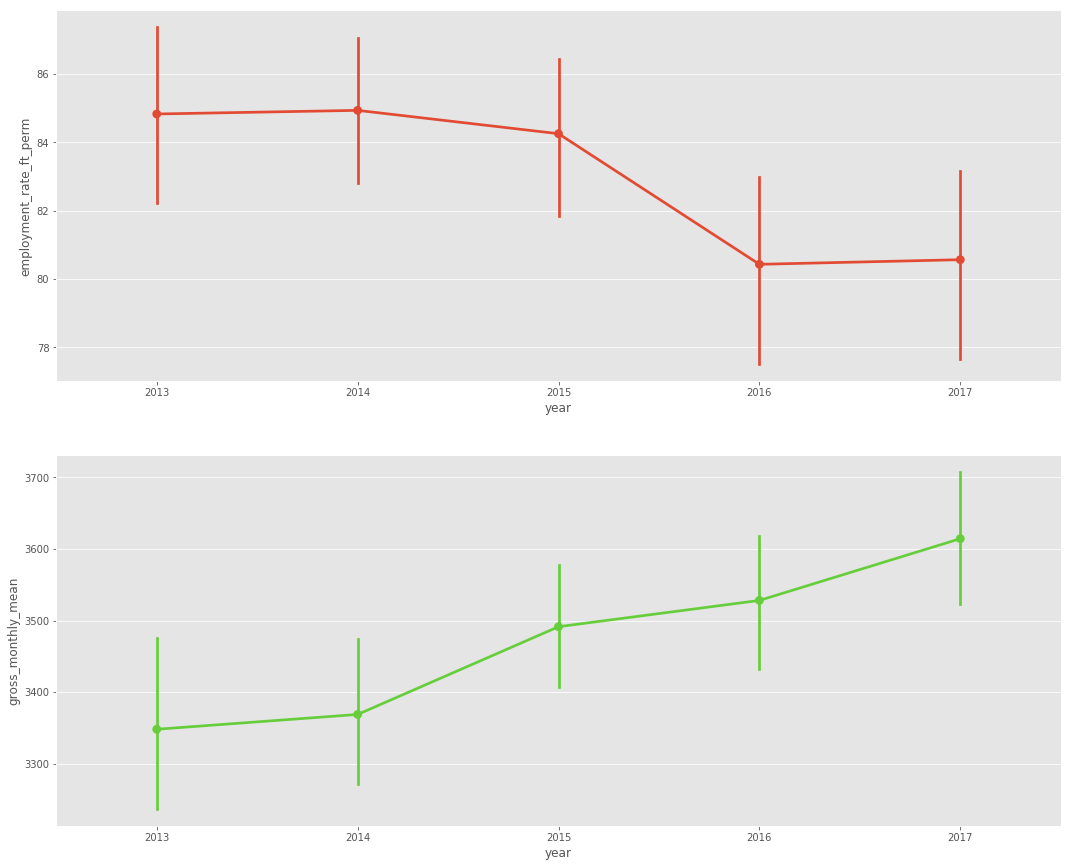

In [65]:
fig,(ax1,ax2)=plt.subplots(nrows=2)
fig.set_size_inches(18,15)
sns.pointplot(data=SG_graduate_employment, x="year", y="employment_rate_ft_perm", ax=ax1)
sns.pointplot(data=SG_graduate_employment, x="year", y="gross_monthly_mean", color="#67ce3b" ,ax=ax2)

[Text(0, 0, 'Nanyang Technological University'),
 Text(0, 0, 'National University of Singapore'),
 Text(0, 0, 'Singapore Management University'),
 Text(0, 0, 'Singapore Institute of Technology'),
 Text(0, 0, 'Singapore University of Technology and Design')]

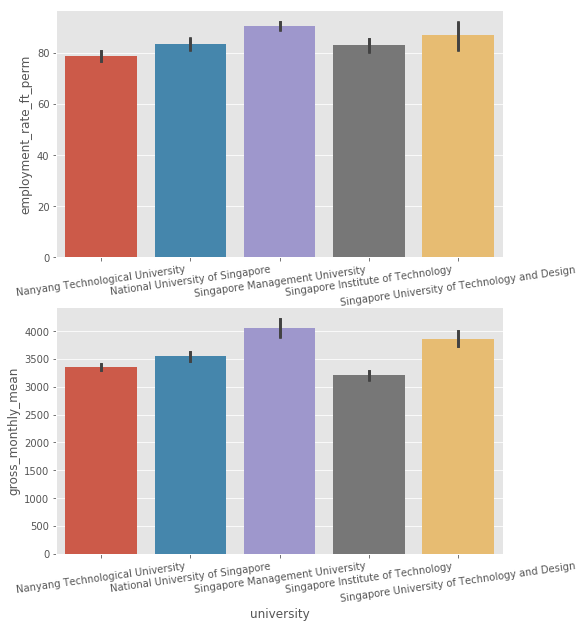

In [70]:
fig,(ax3,ax4)=plt.subplots(nrows=2)
fig.set_size_inches(8,10)
sns.barplot(data=SG_graduate_employment, x="university", y="employment_rate_ft_perm", ax=ax3).set_xticklabels(sns.barplot(data=SG_graduate_employment, x="university", y="employment_rate_ft_perm", ax=ax3).get_xticklabels(), rotation=8)    
sns.barplot(data=SG_graduate_employment, x="university", y="gross_monthly_mean", ax=ax4).set_xticklabels(sns.barplot(data=SG_graduate_employment, x="university", y="gross_monthly_mean", ax=ax4).get_xticklabels(), rotation=8)    


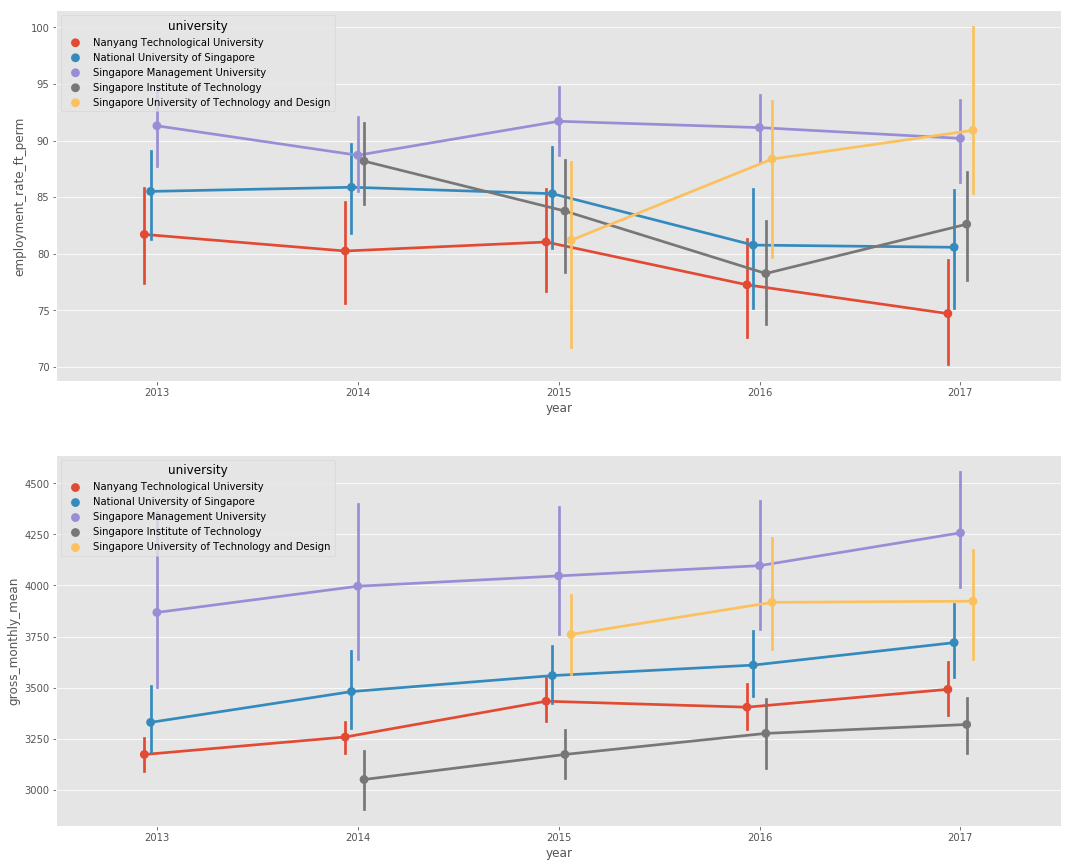

In [71]:
fig,(ax5,ax6)=plt.subplots(nrows=2)
fig.set_size_inches(18,15)
sns.pointplot(data=SG_graduate_employment, x="year", y="employment_rate_ft_perm", hue="university", dodge=True, ax=ax5)
sns.pointplot(data=SG_graduate_employment, x="year", y="gross_monthly_mean", hue="university", dodge=True, ax=ax6)


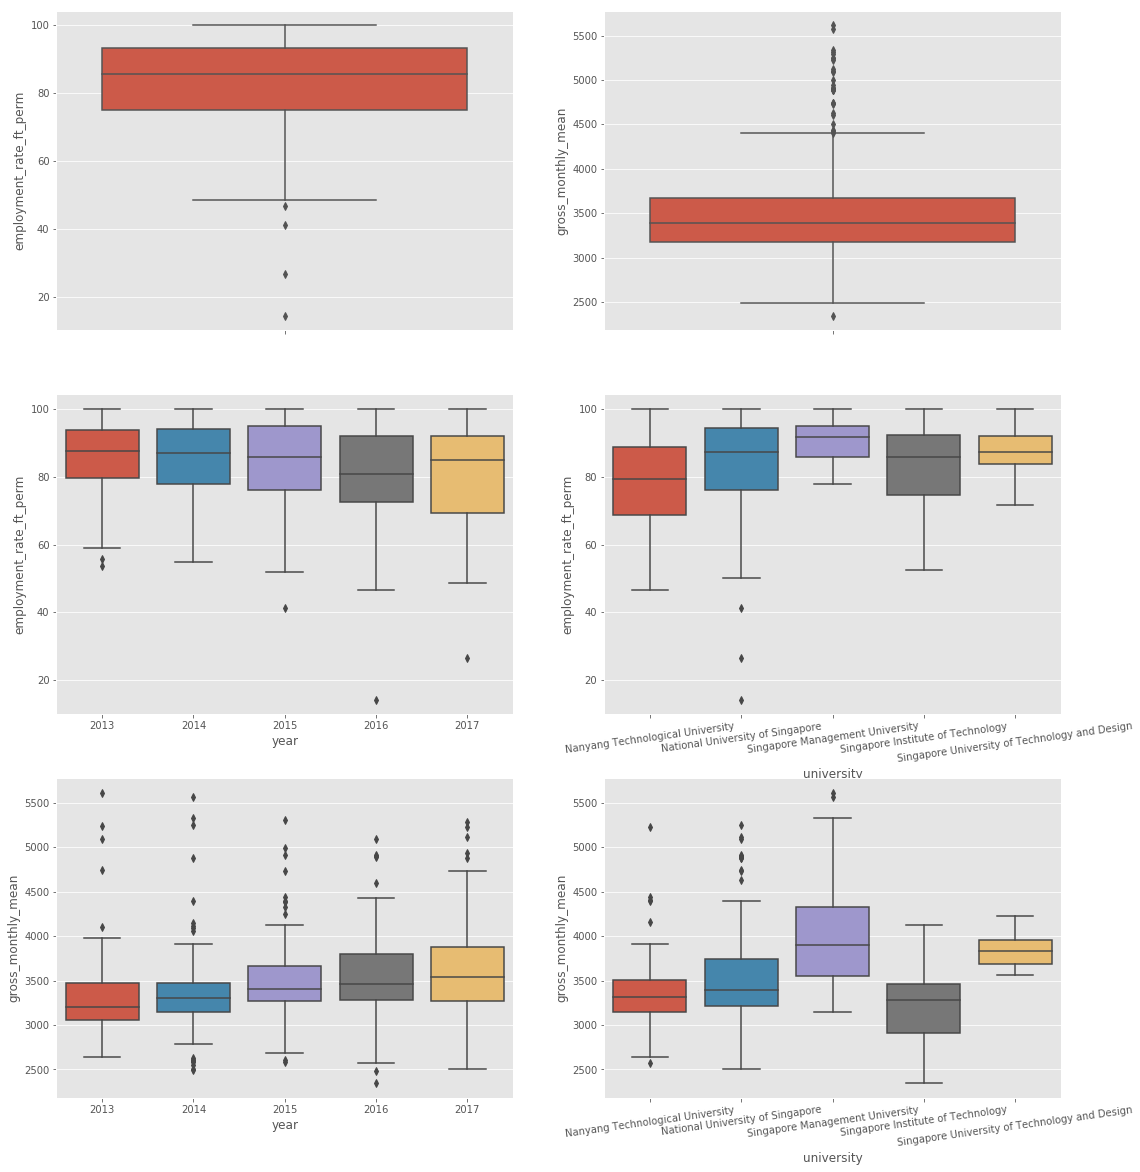

In [80]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(18,20)
a=sns.boxplot(data=SG_graduate_employment,y="employment_rate_ft_perm",orient="v",ax=axes[0][0])
b=sns.boxplot(data=SG_graduate_employment,y="employment_rate_ft_perm",x="year",orient="v",ax=axes[1][0])
c=sns.boxplot(data=SG_graduate_employment,y="employment_rate_ft_perm",x="university",orient="v",ax=axes[1][1])
d=sns.boxplot(data=SG_graduate_employment,y="gross_monthly_mean",orient="v",ax=axes[0][1])
e=sns.boxplot(data=SG_graduate_employment,y="gross_monthly_mean",x="year",orient="v",ax=axes[2][0])
f=sns.boxplot(data=SG_graduate_employment,y="gross_monthly_mean",x="university",orient="v",ax=axes[2][1])

c.set_xticklabels(c.get_xticklabels(), rotation=8) 
f.set_xticklabels(f.get_xticklabels(), rotation=8) 

a
b
c
d
e
f


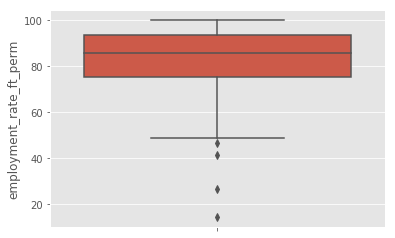

In [76]:
sns.boxplot(data=SG_graduate_employment,y="employment_rate_ft_perm",orient="v")


In [84]:
# Eliminate outliers

nooutliers = SG_graduate_employment[np.abs(SG_graduate_employment["gross_monthly_mean"]-SG_graduate_employment["gross_monthly_mean"].mean()) <= (3*SG_graduate_employment["gross_monthly_mean"].std())]
nooutliers = SG_graduate_employment[np.abs(SG_graduate_employment["employment_rate_ft_perm"]-SG_graduate_employment["employment_rate_ft_perm"].mean()) <= (3*SG_graduate_employment["employment_rate_ft_perm"].std())]


print(SG_graduate_employment.shape)
print(nooutliers.shape)

(513, 12)
(510, 12)


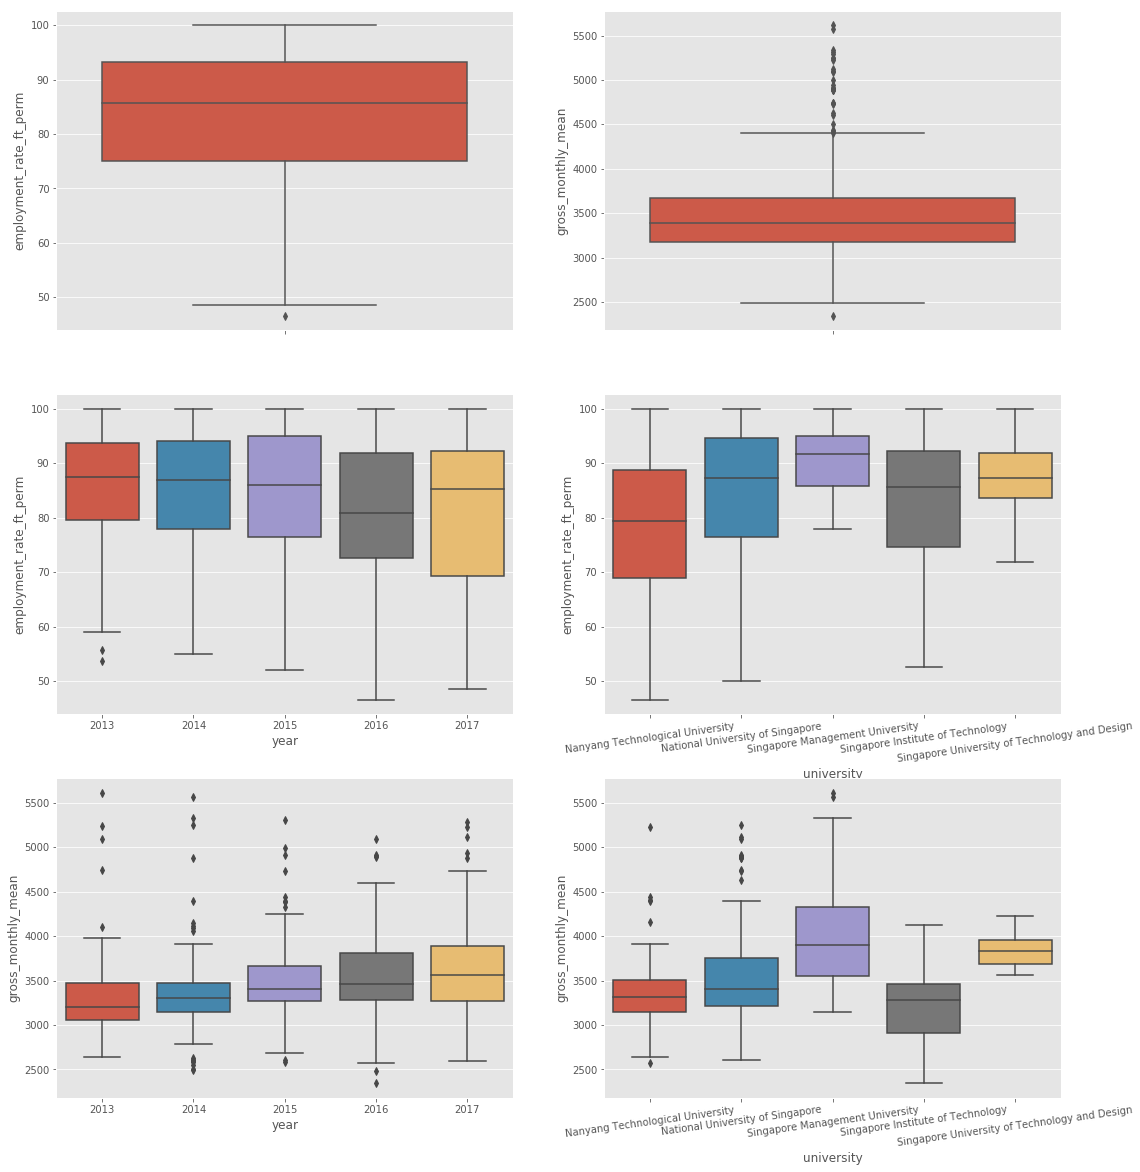

In [85]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(18,20)
a=sns.boxplot(data=nooutliers,y="employment_rate_ft_perm",orient="v",ax=axes[0][0])
b=sns.boxplot(data=nooutliers,y="employment_rate_ft_perm",x="year",orient="v",ax=axes[1][0])
c=sns.boxplot(data=nooutliers,y="employment_rate_ft_perm",x="university",orient="v",ax=axes[1][1])
d=sns.boxplot(data=nooutliers,y="gross_monthly_mean",orient="v",ax=axes[0][1])
e=sns.boxplot(data=nooutliers,y="gross_monthly_mean",x="year",orient="v",ax=axes[2][0])
f=sns.boxplot(data=nooutliers,y="gross_monthly_mean",x="university",orient="v",ax=axes[2][1])

c.set_xticklabels(c.get_xticklabels(), rotation=8) 
f.set_xticklabels(f.get_xticklabels(), rotation=8) 

a
b
c
d
e
f


In [ ]:
#R code 


install.packages("tidyverse") 
install.packages("maps") 
install.packages("viridis") 
install.packages("mapproj") 
install.packages("readShapePoly") 
install.packages("maptools") 


library(maptools)
library(mapproj)


# Libraries
library(tidyverse)

# Get the world polygon and extract Singapore
library(maps)
SG <- readShapePoly("./Singapore_AL382.shp")


SG_employment_geo <-read.csv(file.choose(), header=TRUE)
SG_employment_geo

###Draw ggplot2
gross_by_univ <- ggplot() +  geom_polygon(data=SG, bg="grey", colour="white", aes(x=long, y=lat, group=group)) 
gross_by_univ <- gross_by_univ + geom_point(data=SG_employment_geo, aes(x=LON, y=LAT, size=gross_monthly_mean, color=university))
gross_by_univ <- gross_by_univ + scale_size_continuous(range=c(1,18))
gross_by_univ <- gross_by_univ + ggtitle("Monthly Gross by University in SG")
gross_by_univ


emp_by_univ <- ggplot() +  geom_polygon(data=SG, bg="grey", colour="white", aes(x=long, y=lat, group=group)) 
emp_by_univ <- emp_by_univ + geom_point(data=SG_employment_geo, aes(x=LON, y=LAT, size=employment_rate_ft_perm, color=university))
emp_by_univ <- emp_by_univ + scale_size_continuous(range=c(1,18))
emp_by_univ <- emp_by_univ + ggtitle("Employment Rate by University in SG")
emp_by_univ

